# Outliers

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Datapoints which are far away from obsereved values

Out of the box values

Smaller or Larger values than remaining values

20-60 >> 350

15-200 >> 5

In [2]:
arr1 = np.random.randint(20,60, size = 20)
arr1

array([58, 42, 46, 47, 46, 39, 51, 47, 30, 43, 24, 26, 28, 58, 37, 51, 39,
       25, 58, 31])

In [3]:
arr2 = np.array([28, 37, 52, 48, 270, 20, 31, 32, 43, 40, 36, 26, 24, 32, 23, 51, 38, 51, 20, 28])
arr2

array([ 28,  37,  52,  48, 270,  20,  31,  32,  43,  40,  36,  26,  24,
        32,  23,  51,  38,  51,  20,  28])

## How outliers are introduced in the datasets?

In [ ]:
1. Data Entry Error:
    Human Error
    Age 30 >> 300
    
2. Measurement Error:
    Machine Error/Instrumental Error
    Cricket >> Speed Gun
    130 to 150
    
3. Intentional Error:
    Dummy Datasets/Sample Datasets
    
4. Sampling Error:
    Mixing of data from wrong resources
    
5. Natural Error:
    Most of the Outliers Data belongs to this category

## How to Detect Outliers

In [ ]:
1. Boxplot
2. Z-score (Normal Distribution)
3. IQR Method
4. Scatterplot
5. kdeplot

## How to Handle Outliers

In [ ]:
1. Delete Observations/Trimming(Not Prefferable)
2. Imputation/Capping:
    1. Mean
    2. Median
    3. Zero
    4. Lower Tail
    5. Upper Tail
    6. Any static value
    
3. Transformation: Used to reduce the impact of outliers
    1. Log Transformation
    2. Square root
    3. Cube root
    4. Reciprocal
    5. Box-cox
    6. Standardization
    7. Robust scaler

In [ ]:
Feature Engineering:
    1. Feature Selection:
        Filter, Wrapper, Embedded
    2. Feature Extraction:
        PCA,LDA
    3. Feature Transformation
    4. Feature Creation

## Impact of Outliers

In [ ]:
1. Reduces the power of statistical analysis
2. High impact on mean and std values
3. Algorithms do not perform well in presence of outliers
4. Impact on basic assumption of Linear Regression (Normality, Homoscedasticity)

## Impact of Outliers in ML Algorithm

#### 1. Algorithm which are Sensitive to Outliers

In [ ]:
1. Linear Regression
2. Logistic Regression
3. K-Nearest Neighbor
4. Support Vector Machine
5. K-Means Clustering

#### 2. Algorithm which are Not Sensitive to Outliers

In [ ]:
1. Decision Tree
2. Random Forest
3. AdaBoost
4. XGBoost
5. Gradient Boosting
6. Naive Bayes

<AxesSubplot:ylabel='Density'>

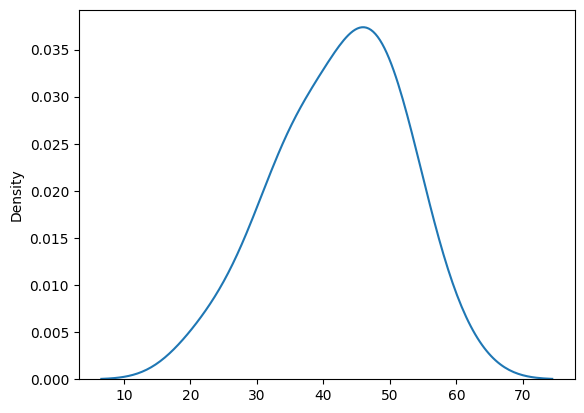

In [4]:
sns.kdeplot(arr1)

<AxesSubplot:ylabel='Density'>

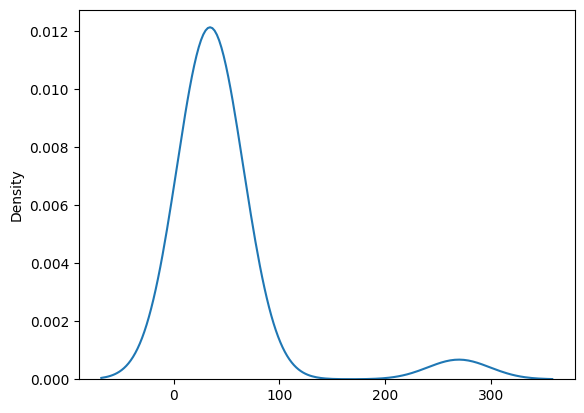

In [5]:
sns.kdeplot(arr2)

C:\Users\cheta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

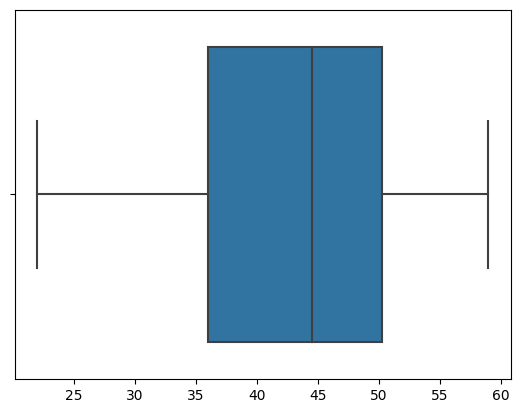

In [6]:
sns.boxplot(arr1)

C:\Users\cheta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

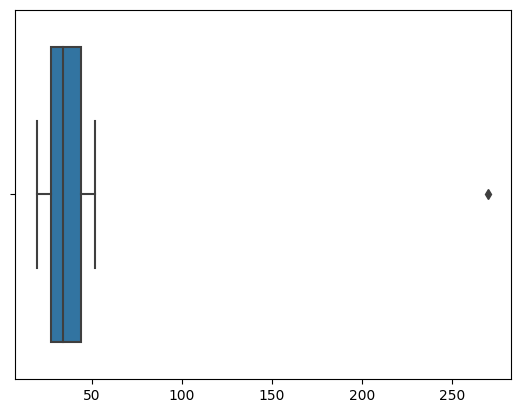

In [7]:
sns.boxplot(arr2)

In [4]:
arr3 = np.array([28, 37, 52, 48, 270, 20, 31, 32, 43, 40, 36, 26, 2, 32, 23, 51, 38, 51, 20, 28])
arr3

array([ 28,  37,  52,  48, 270,  20,  31,  32,  43,  40,  36,  26,   2,
        32,  23,  51,  38,  51,  20,  28])

C:\Users\cheta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

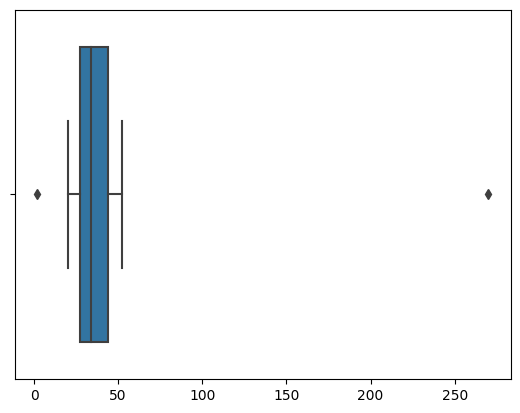

In [9]:
sns.boxplot(arr3)

## 1. Z-Score Method

In [ ]:
When Data distribution is normal
Most of the values lies around mean
std >> how far away is our datapoint is
z-score >> how many std away our datapoint is

outlier treatment:
    1. Trimming(drop)
    2. Capping (impute)

In [ ]:
# Standardization

z_score = (x - x_mean)/std
x = datapoint
x_mean = mean value
std = standard deviation

<AxesSubplot:ylabel='Density'>

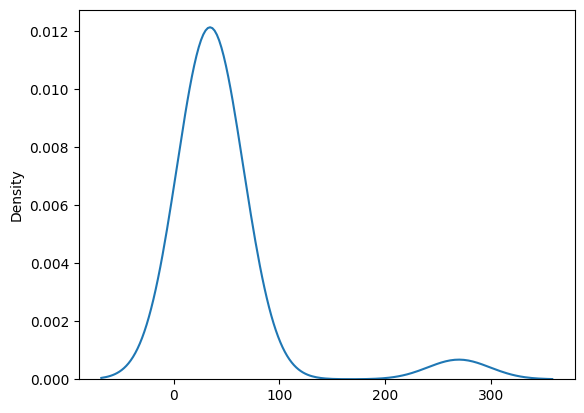

In [10]:
sns.kdeplot(arr2)

In [5]:
from scipy.stats import skew

In [13]:
skew(arr2)

3.8820663843340104

In [14]:
skew(arr1)

-0.36435493639053557

In [15]:
skew(arr3)

3.768855487664523

In [17]:
print(arr1)
mean = np.mean(arr1)
std = np.std(arr1)
print(f'Mean=={mean}, STD=={std}')

[30 35 46 53 45 50 44 40 46 52 36 36 22 45 29 51 59 51 42 36]
Mean==42.4, STD==9.112628599915613


In [19]:
x = 31
z_score_x = (x - mean)/std
z_score_x

-1.251011151722519

In [21]:
x = 51
z_score_x = (x - mean)/std
z_score_x

0.9437452548082165

In [22]:
x = 210
z_score_x = (x - mean)/std
z_score_x

18.392058686727566

In [24]:
print(arr1)
mean = np.mean(arr1)
std = np.std(arr1)
print(f'Mean=={mean}, STD=={std}')

threshold = 3
outliers_list = []

for x_val in arr1:
    z_score = (x_val - mean)/std
    z_score = np.abs(z_score)
    print(x_val, '>>', z_score)
    
    if z_score > threshold:
        outliers_list.append(x_val)
        
print('Outliers are:',outliers_list)

[30 35 46 53 45 50 44 40 46 52 36 36 22 45 29 51 59 51 42 36]
Mean==42.4, STD==9.112628599915613
30 >> 1.360748972049056
35 >> 0.8120598704163721
46 >> 0.39505615317553255
53 >> 1.1632208954612901
45 >> 0.28531833284899577
50 >> 0.8340074344816797
44 >> 0.17558051252245901
40 >> 0.26337076878368815
46 >> 0.39505615317553255
52 >> 1.0534830751347533
36 >> 0.7023220500898353
36 >> 0.7023220500898353
22 >> 2.2386515346613503
45 >> 0.28531833284899577
29 >> 1.4704867923755927
51 >> 0.9437452548082165
59 >> 1.8216478174205109
51 >> 0.9437452548082165
42 >> 0.04389512813061456
36 >> 0.7023220500898353
Outliers are: []


In [26]:
print(arr2)
mean = np.mean(arr2)
std = np.std(arr2)
print(f'Mean=={mean}, STD=={std}')

threshold = 3
outliers_list = []

for x_val in arr2:
    z_score = (x_val - mean)/std
    z_score = np.abs(z_score)
    print(x_val, '>>', z_score)
    
    if z_score > threshold:
        outliers_list.append(x_val)
        
print('Outliers are:',outliers_list)

[ 28  37  52  48 270  20  31  32  43  40  36  26  24  32  23  51  38  51
  20  28]
Mean==46.5, STD==52.24031010627713
28 >> 0.35413266043719493
37 >> 0.181851906710992
52 >> 0.10528268283267957
48 >> 0.028713458954367155
270 >> 4.278305384200706
20 >> 0.5072711081938197
31 >> 0.2967057425284606
32 >> 0.2775634365588825
43 >> 0.06699807089352336
40 >> 0.12442498880225768
36 >> 0.20099421268057008
26 >> 0.3924172723763511
24 >> 0.4307018843155073
32 >> 0.2775634365588825
23 >> 0.44984419028508543
51 >> 0.08614037686310147
38 >> 0.16270960074141388
51 >> 0.08614037686310147
20 >> 0.5072711081938197
28 >> 0.35413266043719493
Outliers are: [270]


In [ ]:
23 = 46.5 - z * (52.24)

In [27]:
z = (23 - 46.5)/52.24
z

-0.4498468606431853

In [6]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

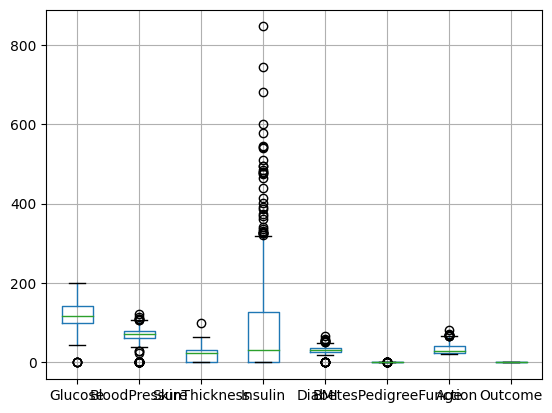

In [29]:
diabetes.boxplot()

In [30]:
def get_outliers(col):
    
    mean = col.mean()
    std = col.std()
    print(f'Mean=={mean}')
    print(f'STD=={std}')

    threshold = 3
    outliers_list = []

    for x_val in col.values:
        z_score = (x_val - mean)/std
        z_score = np.abs(z_score)

        if z_score > threshold:
            print(f'x == {x_val} and zscore = {z_score}')
            outliers_list.append(x_val)
    
    return outliers_list

get_outliers(diabetes['Insulin'])

Mean==79.79947916666667
STD==115.24400235133817
x == 543 and zscore = 4.019302622111291
x == 846 and zscore = 6.648506691892384
x == 495 and zscore = 3.6027950467004253
x == 485 and zscore = 3.516022635156495
x == 495 and zscore = 3.6027950467004253
x == 478 and zscore = 3.4552819470757434
x == 744 and zscore = 5.7634280941442935
x == 680 and zscore = 5.208084660263139
x == 545 and zscore = 4.036657104420077
x == 465 and zscore = 3.3424778120686343
x == 579 and zscore = 4.331683303669441
x == 474 and zscore = 3.420572982458171
x == 480 and zscore = 3.4726364293845298
x == 600 and zscore = 4.513905367911695
x == 440 and zscore = 3.125546783208808
x == 540 and zscore = 3.9932708986481122
x == 480 and zscore = 3.4726364293845298
x == 510 and zscore = 3.732953664016321


[543,
 846,
 495,
 485,
 495,
 478,
 744,
 680,
 545,
 465,
 579,
 474,
 480,
 600,
 440,
 540,
 480,
 510]

In [31]:
from scipy.stats import zscore

In [32]:
zscore(diabetes['Insulin'])

0     -0.692891
1     -0.692891
2     -0.692891
3      0.123302
4      0.765836
         ...   
763    0.870031
764   -0.692891
765    0.279594
766   -0.692891
767   -0.692891
Name: Insulin, Length: 768, dtype: float64

In [35]:
def get_outliers(col):

    threshold = 3
    outliers_list = []

    z_score = zscore(col)
    index = np.where(np.abs(z_score) > threshold)
#     print(index)
    print(col.iloc[index])

get_outliers(diabetes['Insulin'])

8      543
13     846
111    495
153    485
186    495
220    478
228    744
247    680
286    545
370    465
409    579
415    474
486    480
584    600
645    440
655    540
695    480
753    510
Name: Insulin, dtype: int64


In [38]:
z_score_values = zscore(diabetes['Insulin'])
outliers_index = np.where(np.abs(z_score_values) > threshold)[0]
# print(outliers_index)
diabetes.iloc[outliers_index]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,150,70,45,543,30.5,0.158,35,1
13,150,60,23,846,30.1,0.398,59,1
111,155,62,26,495,34.0,0.543,46,1
153,153,82,42,485,40.6,0.687,23,0
186,181,68,36,495,30.1,0.615,60,1
220,177,60,29,478,34.6,1.072,21,1
228,197,70,39,744,36.7,2.329,31,0
247,165,90,33,680,52.3,0.427,23,0
286,155,84,44,545,38.7,0.619,34,0
370,173,82,48,465,38.4,2.137,25,1


## 2. IQR(Inter Quartile Range)

In [ ]:
Use when data is not normally distributed (skewed)

Boxplot:
    Median(Q2/50%ile):
        Middle value of data
        
    1st Quartile(Q1/25%ile):
        middle no between min and median
        
    3rd Quartile(Q3/75%ile):
        middle no between max and median
        
    IQR:
        25% to 75%
        
    minimum = Q1 - 1.5 * IQR
    maximum = Q3 + 1.5 * IQR

In [39]:
diabetes.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
diabetes['Glucose'].median()

117.0

In [41]:
diabetes['Glucose'].quantile(0.5)

117.0

C:\Users\cheta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

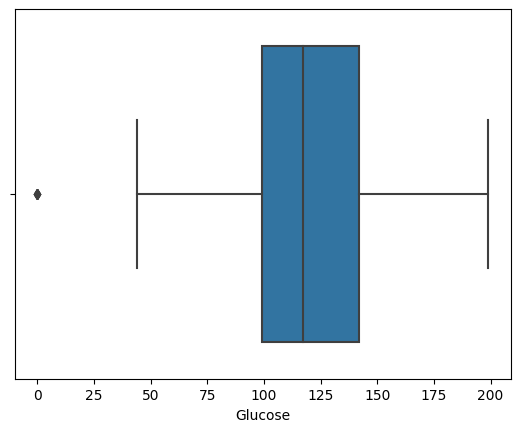

In [42]:
sns.boxplot(diabetes['Glucose'])

<AxesSubplot:>

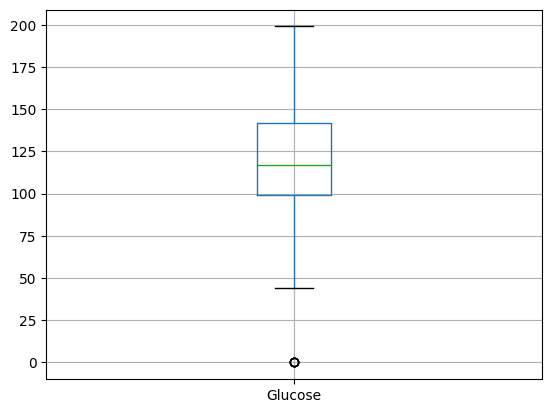

In [44]:
diabetes[['Glucose']].boxplot()

<AxesSubplot:>

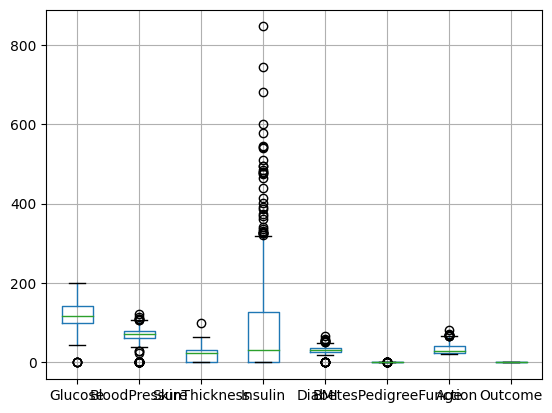

In [45]:
diabetes.boxplot()

In [48]:
q1 = diabetes['Glucose'].quantile(0.25)
q2 = diabetes['Glucose'].quantile(0.5)
q3 = diabetes['Glucose'].quantile(0.75)

print('Q1 == ', q1)
print('Q2 == ', q2)
print('Q3 == ', q3)

iqr = q3 - q1
print('IQR == ',iqr)

upper_tail  = q3 + 1.5*iqr
lower_tail  = q1 - 1.5*iqr

print('Upper Tail ==', upper_tail)
print('Lower Tail ==', lower_tail)

Q1 ==  99.0
Q2 ==  117.0
Q3 ==  142.0
IQR ==  43.0
Upper Tail == 206.5
Lower Tail == 34.5


In [49]:
q1 = diabetes['Insulin'].quantile(0.25)
q2 = diabetes['Insulin'].quantile(0.5)
q3 = diabetes['Insulin'].quantile(0.75)

print('Q1 == ', q1)
print('Q2 == ', q2)
print('Q3 == ', q3)

iqr = q3 - q1
print('IQR == ',iqr)

upper_tail  = q3 + 1.5*iqr
lower_tail  = q1 - 1.5*iqr

print('Upper Tail ==', upper_tail)
print('Lower Tail ==', lower_tail)

Q1 ==  0.0
Q2 ==  30.5
Q3 ==  127.25
IQR ==  127.25
Upper Tail == 318.125
Lower Tail == -190.875


In [50]:
diabetes[diabetes['Insulin'] > upper_tail]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,150,70,45,543,30.5,0.158,35,1
13,150,60,23,846,30.1,0.398,59,1
54,150,66,42,342,34.7,0.718,42,0
111,155,62,26,495,34.0,0.543,46,1
139,105,72,29,325,36.9,0.159,28,0
153,153,82,42,485,40.6,0.687,23,0
186,181,68,36,495,30.1,0.615,60,1
220,177,60,29,478,34.6,1.072,21,1
228,197,70,39,744,36.7,2.329,31,0
231,134,80,37,370,46.2,0.238,46,1


In [51]:
diabetes['Insulin'][diabetes['Insulin'] > upper_tail]

8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    579
415    474
480    328
486    480
519    326
574    330
584    600
612    321
645    440
655    540
695    480
707    335
710    387
715    392
753    510
Name: Insulin, dtype: int64

In [52]:
diabetes['Insulin'].loc[diabetes['Insulin'] > upper_tail] = upper_tail

8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    579
415    474
480    328
486    480
519    326
574    330
584    600
612    321
645    440
655    540
695    480
707    335
710    387
715    392
753    510
Name: Insulin, dtype: int64

In [53]:
def get_iqr(col):
    q1 = col.quantile(0.25)
    q2 = col.quantile(0.5)
    q3 = col.quantile(0.75)

    print('Q1 == ', q1)
    print('Q2 == ', q2)
    print('Q3 == ', q3)

    iqr = q3 - q1
    print('IQR == ',iqr)

    upper_tail  = q3 + 1.5*iqr
    lower_tail  = q1 - 1.5*iqr

    print('Upper Tail ==', upper_tail)
    print('Lower Tail ==', lower_tail)
    
get_iqr(diabetes['Insulin'])

Q1 ==  0.0
Q2 ==  30.5
Q3 ==  127.25
IQR ==  127.25
Upper Tail == 318.125
Lower Tail == -190.875


In [54]:
get_iqr(diabetes['Age'])

Q1 ==  24.0
Q2 ==  29.0
Q3 ==  41.0
IQR ==  17.0
Upper Tail == 66.5
Lower Tail == -1.5


In [7]:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Age', ylabel='Density'>

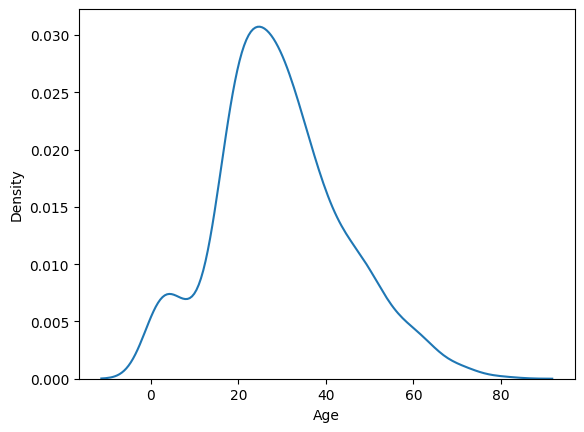

In [56]:
sns.kdeplot(titanic['Age'])

### Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Gender'>

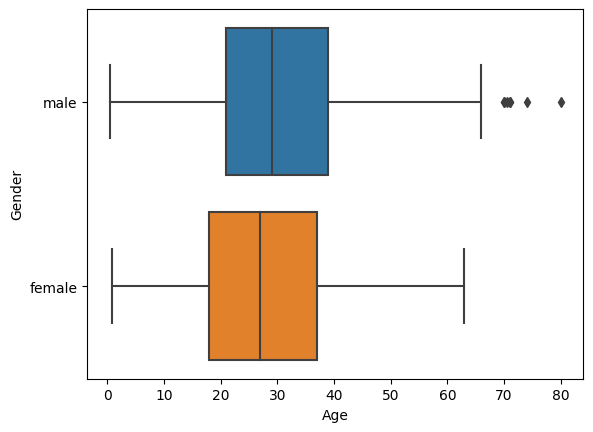

In [58]:
sns.boxplot(x = titanic['Age'], y=titanic['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

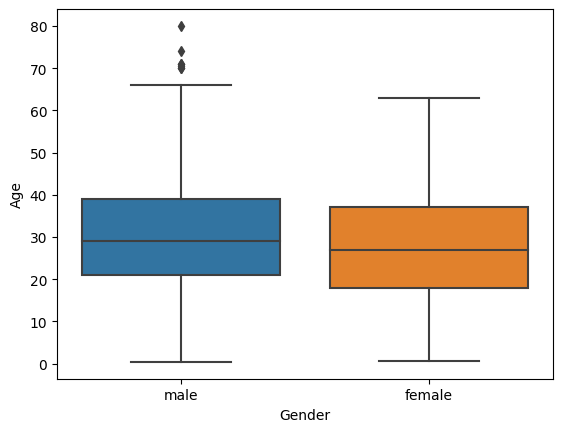

In [59]:
sns.boxplot(y = titanic['Age'], x=titanic['Gender'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

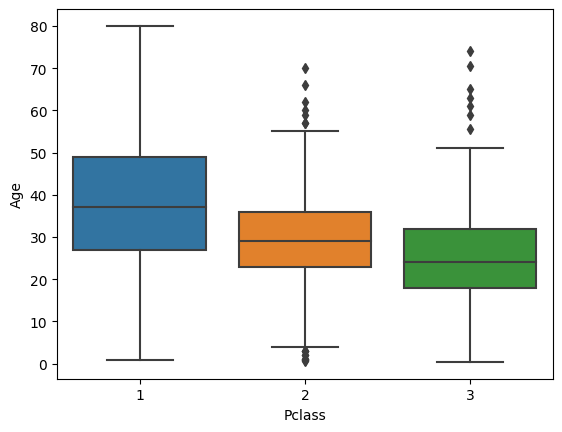

In [60]:
sns.boxplot(y = titanic['Age'], x=titanic['Pclass'])

### Multivariate Analysis

In [61]:
diabetes

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Age'>

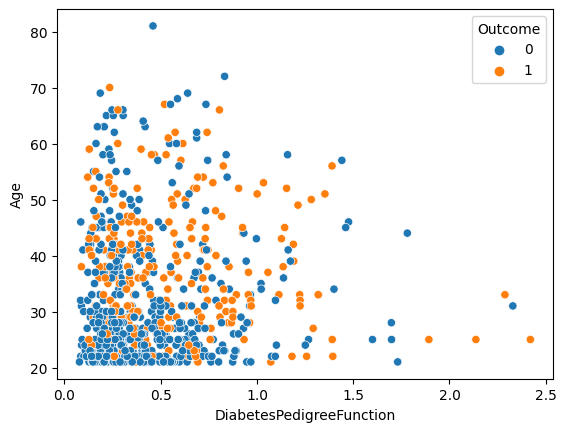

In [63]:
sns.scatterplot(x = diabetes['DiabetesPedigreeFunction'], y= diabetes['Age'], hue = diabetes['Outcome'])

In [8]:
insurance = pd.read_csv('medical_insurance.csv')
insurance

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


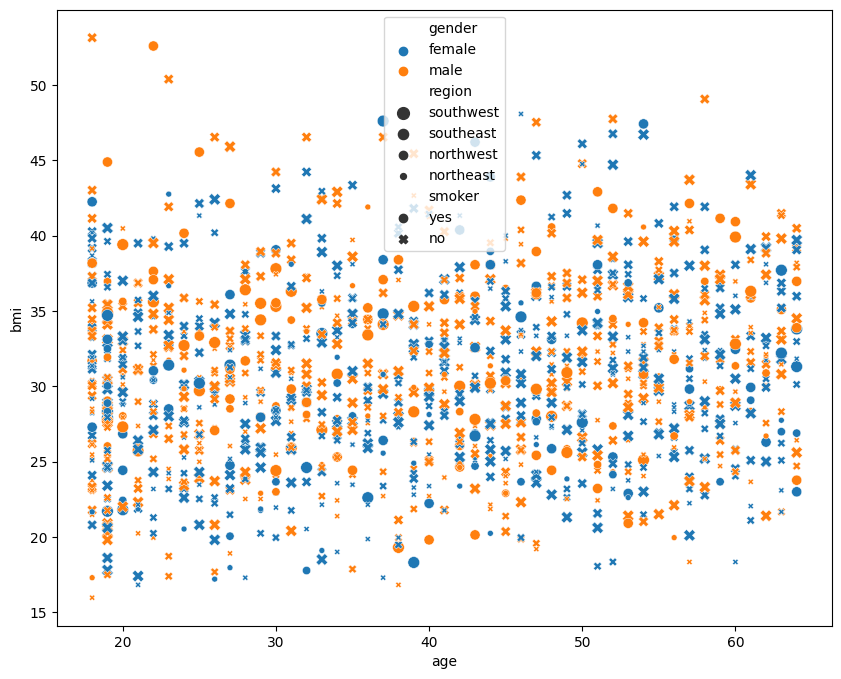

In [71]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = insurance['age'], y= insurance['bmi'], hue=insurance['gender'],
               style=insurance['smoker'], size = insurance['region'])
plt.legend(loc='best')

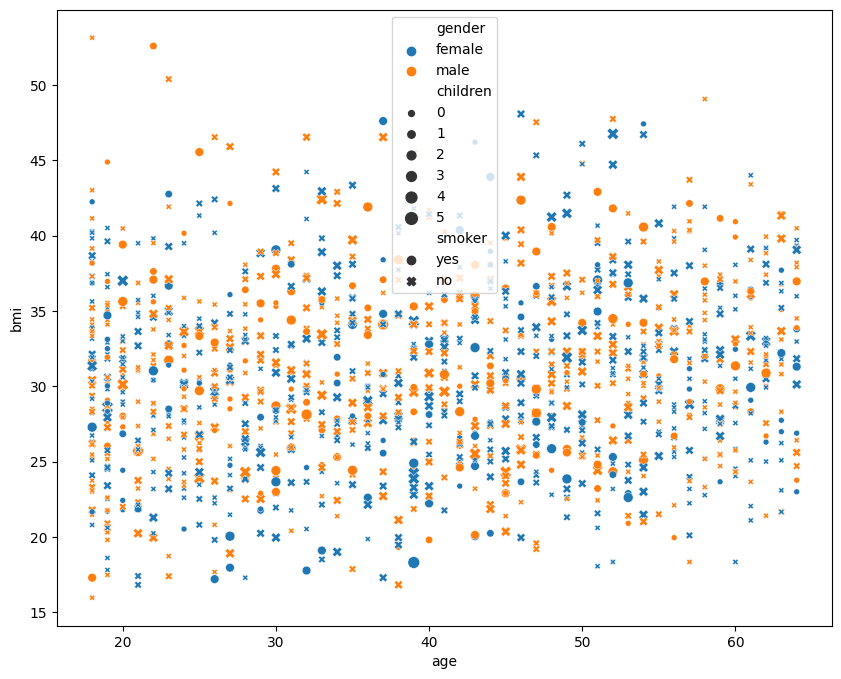

In [72]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = insurance['age'], y= insurance['bmi'], hue=insurance['gender'],
               style=insurance['smoker'], size = insurance['children'])
plt.legend(loc='best')

## Handling Outliers

In [ ]:
1. Delete Observation
2. Impuatation(mean, median, uppertail......)
3. Data Transformations

#### 1. Trimming(Delete)

In [73]:
df = diabetes.copy()

In [78]:
q1 = df['Insulin'].quantile(0.25)
q2 = df['Insulin'].quantile(0.5)
q3 = df['Insulin'].quantile(0.75)

print('Q1 == ', q1)
print('Q2 == ', q2)
print('Q3 == ', q3)

iqr = q3 - q1
print('IQR == ',iqr)

upper_tail  = q3 + 1.5*iqr
lower_tail  = q1 - 1.5*iqr

print('Upper Tail ==', upper_tail)
print('Lower Tail ==', lower_tail)

# np.where(df['Insulin']> upper_tail)
ind = df['Insulin'].loc[df['Insulin']>upper_tail].index

print(ind)

df.drop(ind)

Q1 ==  0.0
Q2 ==  30.5
Q3 ==  127.25
IQR ==  127.25
Upper Tail == 318.125
Lower Tail == -190.875
Int64Index([  8,  13,  54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258,
            286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584,
            612, 645, 655, 695, 707, 710, 715, 753],
           dtype='int64')


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [79]:
df.shape

(768, 8)

#### drop

In [ ]:
df.drop(row_list or column_list, axis = 0, inplace=)

<AxesSubplot:>

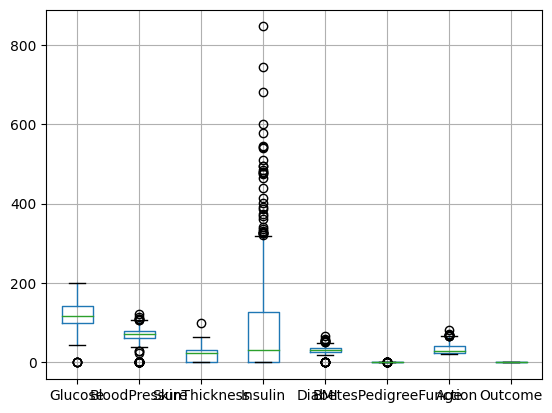

In [80]:
df.boxplot()

In [81]:
q1 = df['BloodPressure'].quantile(0.25)
q2 = df['BloodPressure'].quantile(0.5)
q3 = df['BloodPressure'].quantile(0.75)

print('Q1 == ', q1)
print('Q2 == ', q2)
print('Q3 == ', q3)

iqr = q3 - q1
print('IQR == ',iqr)

upper_tail  = q3 + 1.5*iqr
lower_tail  = q1 - 1.5*iqr

print('Upper Tail ==', upper_tail)
print('Lower Tail ==', lower_tail)

# np.where(df['Insulin']> upper_tail)
ind = df['BloodPressure'].loc[(df['BloodPressure']>upper_tail) | (df['BloodPressure']< lower_tail)].index

print(ind)

df.drop(ind)

Q1 ==  62.0
Q2 ==  72.0
Q3 ==  80.0
IQR ==  18.0
Upper Tail == 107.0
Lower Tail == 35.0
Int64Index([  7,  15,  18,  43,  49,  60,  78,  81,  84, 106, 125, 172, 177,
            193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 362, 426, 430,
            435, 453, 468, 484, 494, 522, 533, 535, 549, 589, 597, 601, 604,
            619, 643, 691, 697, 703, 706],
           dtype='int64')


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [84]:
def delete_outliers(col):
    q1 = col.quantile(0.25)
    q2 = col.quantile(0.5)
    q3 = col.quantile(0.75)

    print('Q1 == ', q1)
    print('Q2 == ', q2)
    print('Q3 == ', q3)

    iqr = q3 - q1
    print('IQR == ',iqr)

    upper_tail  = q3 + 1.5*iqr
    lower_tail  = q1 - 1.5*iqr

    print('Upper Tail ==', upper_tail)
    print('Lower Tail ==', lower_tail)

    # np.where(df['Insulin']> upper_tail)
    ind = col.loc[(col>upper_tail) | (col< lower_tail)].index
    return ind
#     print(ind)
#     df.drop(ind)

bp_outliers = delete_outliers(df['BloodPressure'])
bp_outliers

df.drop(bp_outliers)

Q1 ==  62.0
Q2 ==  72.0
Q3 ==  80.0
IQR ==  18.0
Upper Tail == 107.0
Lower Tail == 35.0


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


## Extreme Outliers

In [85]:
def delete_outliers(col):
    q1 = col.quantile(0.25)
    q2 = col.quantile(0.5)
    q3 = col.quantile(0.75)

    print('Q1 == ', q1)
    print('Q2 == ', q2)
    print('Q3 == ', q3)

    iqr = q3 - q1
    print('IQR == ',iqr)

    upper_tail  = q3 + 3*iqr
    lower_tail  = q1 - 3*iqr

    print('Upper Tail ==', upper_tail)
    print('Lower Tail ==', lower_tail)

    # np.where(df['Insulin']> upper_tail)
    ind = col.loc[(col>upper_tail) | (col< lower_tail)].index
    return ind
#     print(ind)
#     df.drop(ind)

bp_outliers = delete_outliers(df['BloodPressure'])
bp_outliers

df.drop(bp_outliers)

Q1 ==  62.0
Q2 ==  72.0
Q3 ==  80.0
IQR ==  18.0
Upper Tail == 134.0
Lower Tail == 8.0


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


## 2. Imputation Technique

In [87]:
def impute_outliers(col):
    q1 = col.quantile(0.25)
    q2 = col.quantile(0.5)
    q3 = col.quantile(0.75)

    print('Q1 == ', q1)
    print('Q2 == ', q2)
    print('Q3 == ', q3)

    iqr = q3 - q1
    print('IQR == ',iqr)

    upper_tail  = q3 + 1.5*iqr
    lower_tail  = q1 - 1.5*iqr

    print('Upper Tail ==', upper_tail)
    print('Lower Tail ==', lower_tail)

    return upper_tail, lower_tail

upper_tail, lower_tail = impute_outliers(df['Age'])

Q1 ==  24.0
Q2 ==  29.0
Q3 ==  41.0
IQR ==  17.0
Upper Tail == 66.5
Lower Tail == -1.5


In [88]:
df['Age'].loc[df['Age']>upper_tail] = q2

123    69
363    67
453    72
459    81
489    67
537    67
666    70
674    68
684    69
Name: Age, dtype: int64

In [ ]:
df['Age'].loc[df['Age']>upper_tail] = df['Age'].mean()

In [ ]:
df['Age'].loc[df['Age']>upper_tail] = upper_tail

In [ ]:
df['Age'] = np.where(df['Age'] > upper_tail, upper_tail, df['Age'])

In [ ]:
df['Age'] = np.where(df['Age'] > upper_tail, upper_tail, 
                    np.where(df['Age']<lower_tail, lower_tail, df['Age']))

In [89]:
upper_tail, lower_tail = impute_outliers(df['Insulin'])

Q1 ==  0.0
Q2 ==  30.5
Q3 ==  127.25
IQR ==  127.25
Upper Tail == 318.125
Lower Tail == -190.875


In [9]:
df1 = diabetes.copy()
df1['outliers_flag'] = np.where(df1['Insulin'] > upper_tail, 1, 0 )
df1

NameError: name 'upper_tail' is not defined

In [91]:
df1['Insulin'] = np.where(df1['Insulin'] > upper_tail, upper_tail, df1['Insulin'] )
df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outliers_flag
0,148,50,35,0.0,33.6,0.627,50,1,0
1,85,66,29,0.0,26.6,0.351,31,0,0
2,183,64,0,0.0,23.3,0.672,52,1,0
3,150,66,23,94.0,28.1,0.167,21,0,0
4,150,40,35,168.0,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...
763,101,76,48,180.0,32.9,0.171,63,0,0
764,122,70,27,0.0,36.8,0.340,27,0,0
765,121,72,23,112.0,26.2,0.245,30,0,0
766,126,60,0,0.0,30.1,0.349,47,1,0


In [92]:
df1[df1['outliers_flag']==1]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outliers_flag
8,150,70,45,318.125,30.5,0.158,35,1,1
13,150,60,23,318.125,30.1,0.398,59,1,1
54,150,66,42,318.125,34.7,0.718,42,0,1
111,155,62,26,318.125,34.0,0.543,46,1,1
139,105,72,29,318.125,36.9,0.159,28,0,1
153,153,82,42,318.125,40.6,0.687,23,0,1
186,181,68,36,318.125,30.1,0.615,60,1,1
220,177,60,29,318.125,34.6,1.072,21,1,1
228,197,70,39,318.125,36.7,2.329,31,0,1
231,134,80,37,318.125,46.2,0.238,46,1,1


## 3. Transformations

### 1. Log Transformations

In [ ]:
Natural log >> np.log()

In [93]:
x = 1
print(np.log(x))
print(np.log2(x))
print(np.log10(x))

0.0
0.0
0.0


In [94]:
x = 0
print(np.log(x))
print(np.log2(x))
print(np.log10(x))

-inf
-inf
-inf


C:\Users\cheta\AppData\Local\Temp\ipykernel_3936\3872693162.py:2: RuntimeWarning: divide by zero encountered in log
  print(np.log(x))
C:\Users\cheta\AppData\Local\Temp\ipykernel_3936\3872693162.py:3: RuntimeWarning: divide by zero encountered in log2
  print(np.log2(x))
C:\Users\cheta\AppData\Local\Temp\ipykernel_3936\3872693162.py:4: RuntimeWarning: divide by zero encountered in log10
  print(np.log10(x))


In [95]:
x = -10
print(np.log(x))
print(np.log2(x))
print(np.log10(x))

nan
nan
nan


C:\Users\cheta\AppData\Local\Temp\ipykernel_3936\1098300974.py:2: RuntimeWarning: invalid value encountered in log
  print(np.log(x))
C:\Users\cheta\AppData\Local\Temp\ipykernel_3936\1098300974.py:3: RuntimeWarning: invalid value encountered in log2
  print(np.log2(x))
C:\Users\cheta\AppData\Local\Temp\ipykernel_3936\1098300974.py:4: RuntimeWarning: invalid value encountered in log10
  print(np.log10(x))


<AxesSubplot:xlabel='Age', ylabel='Density'>

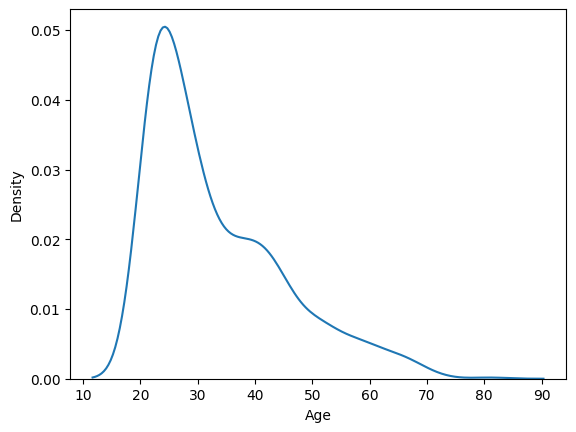

In [96]:
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

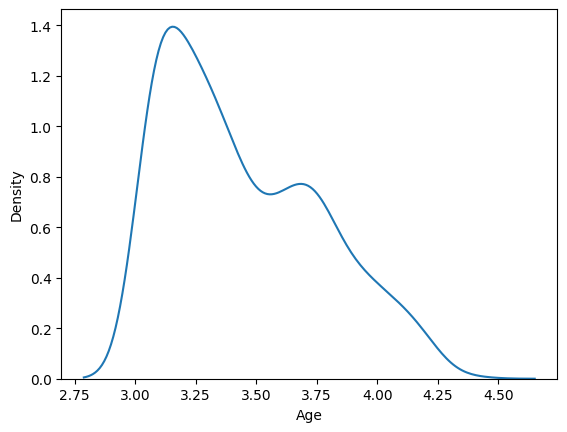

In [97]:
sns.kdeplot(np.log(df['Age']))

In [ ]:
df['Age'] = np.log(df['Age'])

In [98]:
from sklearn.preprocessing import FunctionTransformer

In [99]:
funtrans = FunctionTransformer(func=np.log)
funtrans

FunctionTransformer(func=<ufunc 'log'>)

In [100]:
funtrans.fit_transform(arr1)

array([3.40119738, 3.55534806, 3.8286414 , 3.97029191, 3.80666249,
       3.91202301, 3.78418963, 3.68887945, 3.8286414 , 3.95124372,
       3.58351894, 3.58351894, 3.09104245, 3.80666249, 3.36729583,
       3.93182563, 4.07753744, 3.93182563, 3.73766962, 3.58351894])

In [101]:
arr1

array([30, 35, 46, 53, 45, 50, 44, 40, 46, 52, 36, 36, 22, 45, 29, 51, 59,
       51, 42, 36])

In [102]:
funtrans.fit_transform([21,33,54,46])

array([3.04452244, 3.49650756, 3.98898405, 3.8286414 ])

In [ ]:
fit >> training/learns parameters
fit_transform >> training >> (fit + transform ) for training
transform >> training + testing

In [103]:
funtrans.transform(arr2)

array([3.33220451, 3.61091791, 3.95124372, 3.87120101, 5.59842196,
       2.99573227, 3.4339872 , 3.4657359 , 3.76120012, 3.68887945,
       3.58351894, 3.25809654, 3.17805383, 3.4657359 , 3.13549422,
       3.93182563, 3.63758616, 3.93182563, 2.99573227, 3.33220451])

In [11]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [12]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<AxesSubplot:>

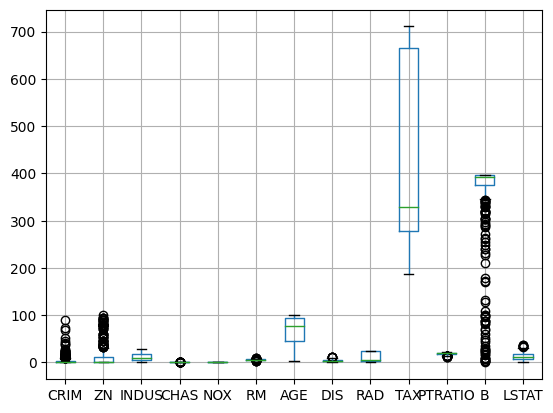

In [108]:
boston_df.boxplot()

<AxesSubplot:xlabel='DIS'>

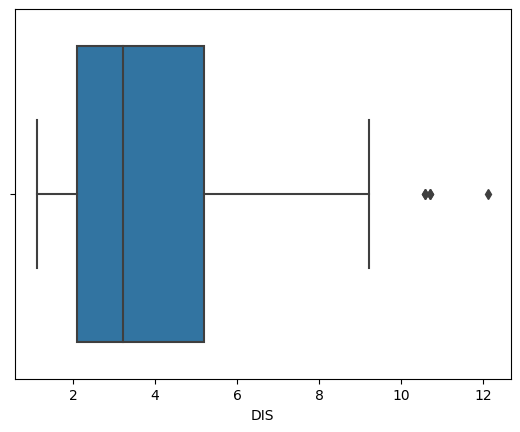

In [109]:
sns.boxplot(boston_df['DIS'])

<AxesSubplot:xlabel='DIS'>

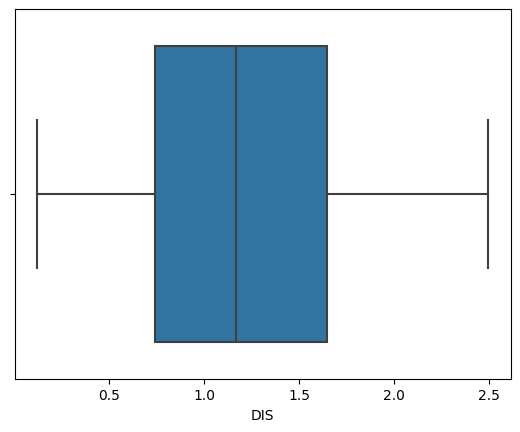

In [110]:
sns.boxplot(np.log(boston_df['DIS']))

<AxesSubplot:xlabel='B'>

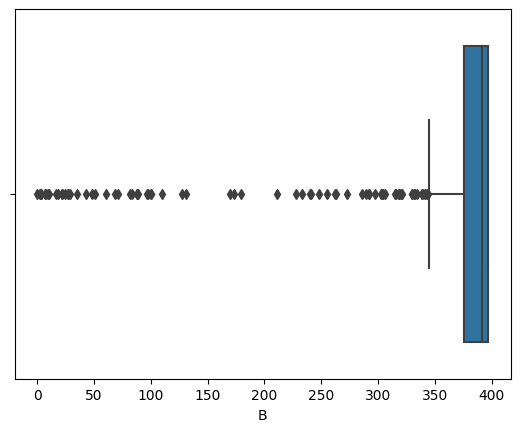

In [111]:
sns.boxplot(boston_df['B'])

<AxesSubplot:xlabel='B'>

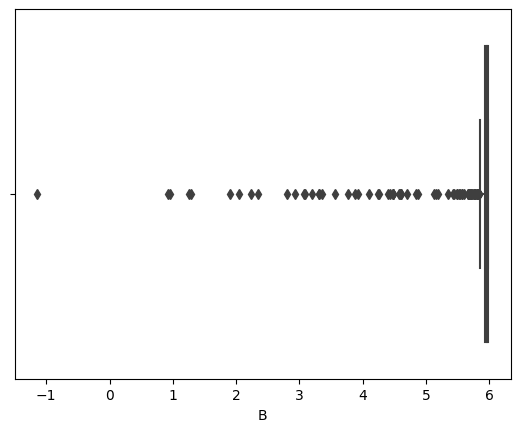

In [113]:
sns.boxplot(np.log(boston_df['B']))

<AxesSubplot:xlabel='B'>

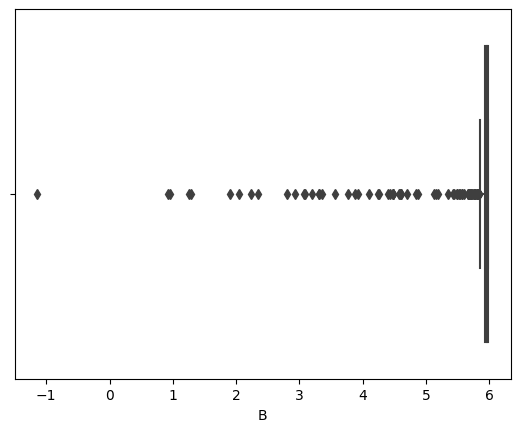

In [112]:
sns.boxplot(funtrans.transform(boston_df['B']))

### 2. Square root

<AxesSubplot:xlabel='DIS'>

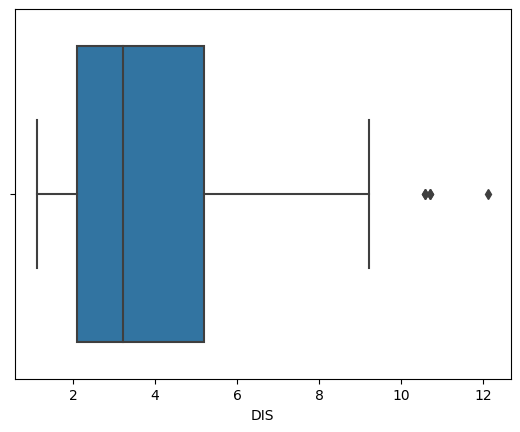

In [114]:
sns.boxplot(boston_df['DIS'])

<AxesSubplot:xlabel='DIS'>

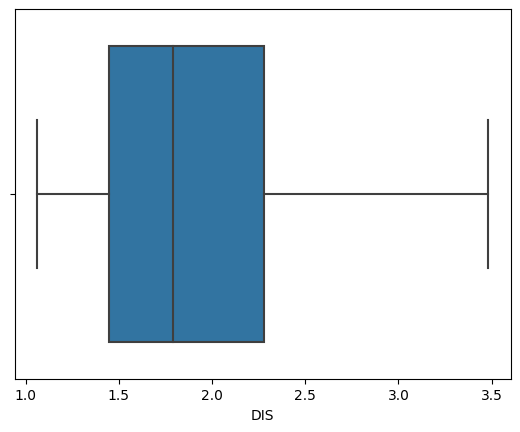

In [115]:
sns.boxplot(np.sqrt(boston_df['DIS']))

<AxesSubplot:xlabel='B'>

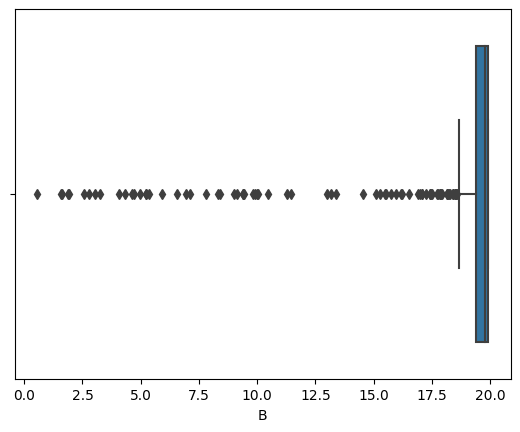

In [116]:
sns.boxplot(np.sqrt(boston_df['B']))

### 3. Square Transformation

In [13]:
arr3 = np.array([21,33,57,26,38,27,58,45,1,1,2,3,5,4,3,4,28,58,56,27,22,38,46,45,43,55,34,54])

<AxesSubplot:ylabel='Density'>

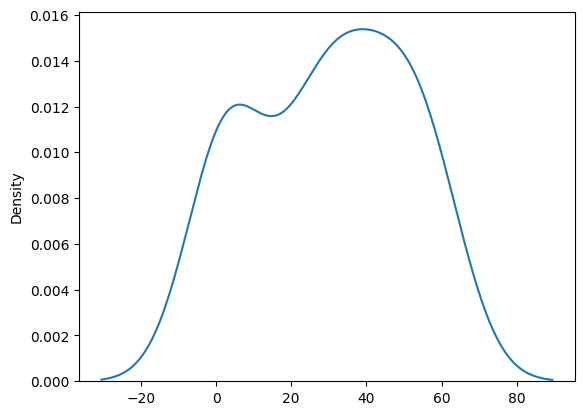

In [118]:
sns.kdeplot(arr3)

<AxesSubplot:>

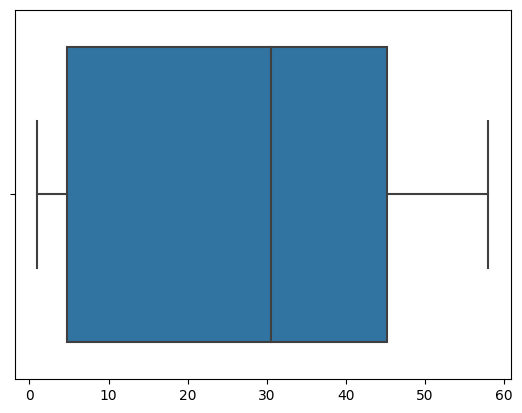

In [119]:
sns.boxplot(arr3)

<AxesSubplot:>

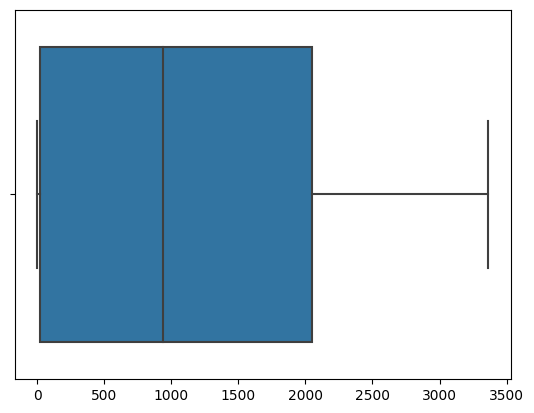

In [120]:
sns.boxplot(arr3**2)

<AxesSubplot:>

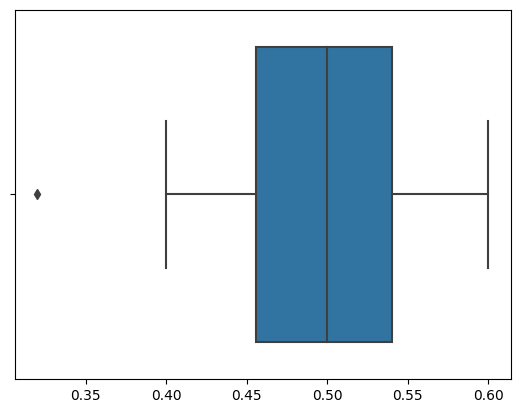

In [122]:
arr4 = np.array([0.4,0.54,0.32,0.58,0.54,0.6,0.5,0.456,0.5])
sns.boxplot(arr4)

<AxesSubplot:>

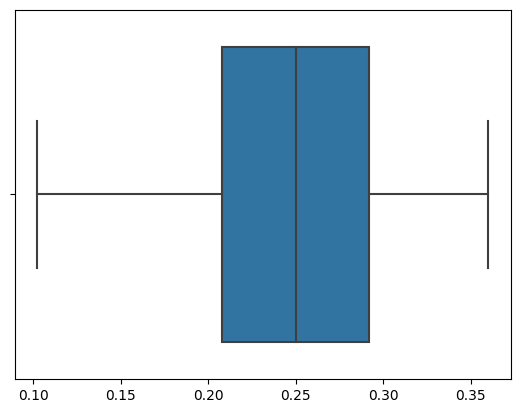

In [123]:
sns.boxplot(arr4**2)

## 4. Cuberoot

<AxesSubplot:xlabel='DIS'>

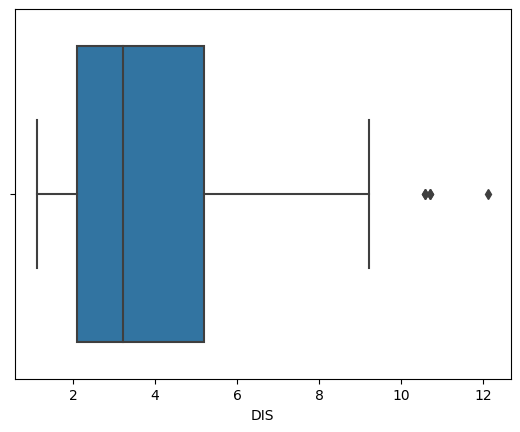

In [14]:
sns.boxplot(boston_df['DIS'])

<AxesSubplot:xlabel='DIS'>

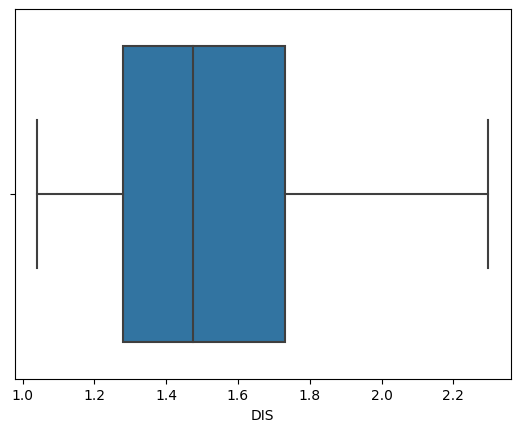

In [15]:
sns.boxplot(np.cbrt(boston_df['DIS']))

<AxesSubplot:xlabel='B'>

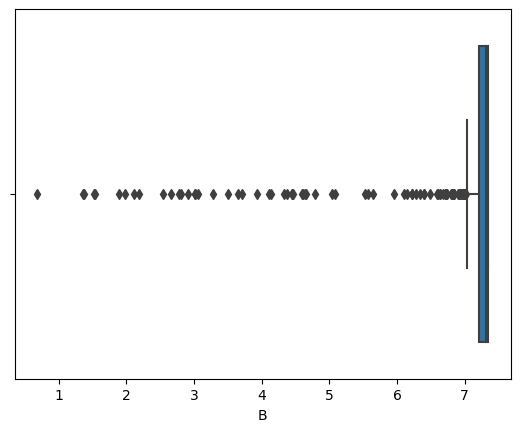

In [16]:
sns.boxplot(np.cbrt(boston_df['B']))

## 5. Reciprocal

In [ ]:
x = 100
1/100 >> 0.01

<AxesSubplot:xlabel='B', ylabel='Density'>

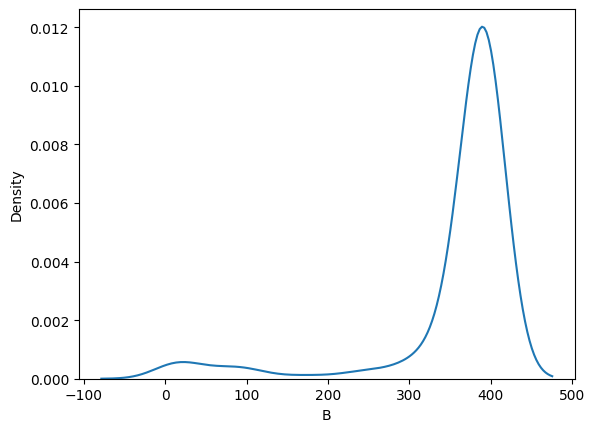

In [18]:
sns.kdeplot(boston_df['B'])

<AxesSubplot:xlabel='B', ylabel='Density'>

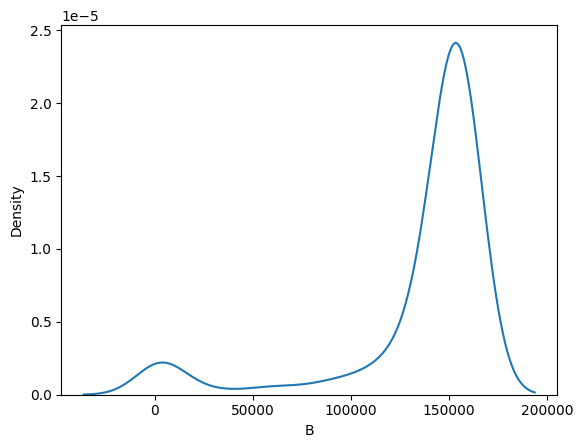

In [19]:
sns.kdeplot(boston_df['B']**2)

<AxesSubplot:xlabel='B', ylabel='Density'>

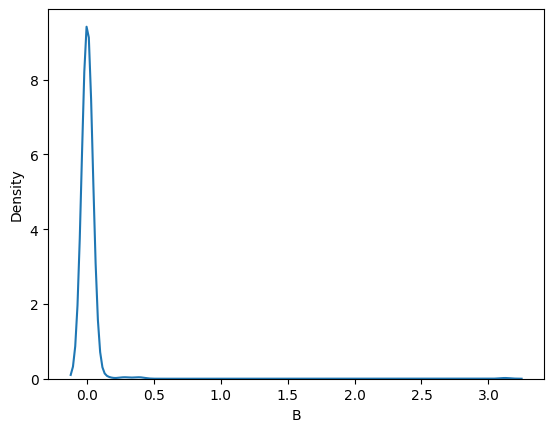

In [20]:
sns.kdeplot(1/boston_df['B'])

<AxesSubplot:xlabel='DIS', ylabel='Density'>

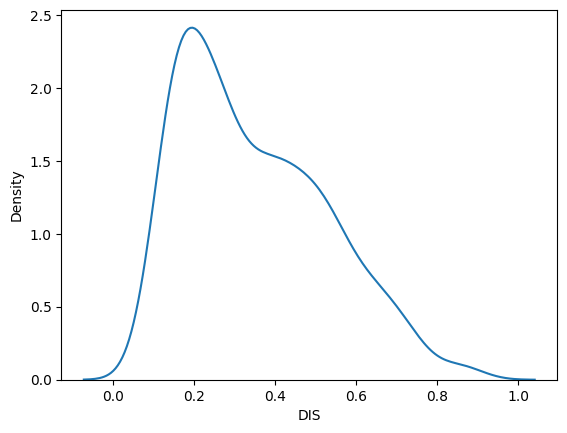

In [21]:
sns.kdeplot(1/boston_df['DIS'])

<AxesSubplot:xlabel='DIS'>

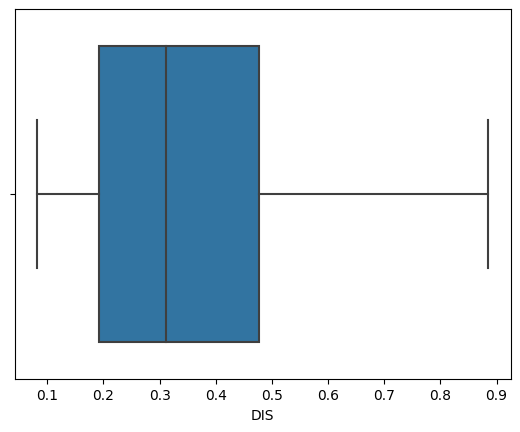

In [22]:
sns.boxplot(1/boston_df['DIS'])

<AxesSubplot:xlabel='B'>

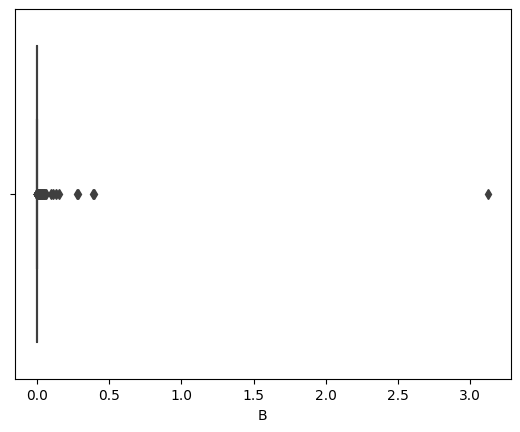

In [24]:
sns.boxplot(1/boston_df['B'])

## 6. Box-Cox Transformations

In [ ]:
Power Transformer:
    1. Box-Cox Transformer
    2. Yeo-Johnson Transformer

In [ ]:
Skewed Data >> Normally Distributed Data

In [ ]:
x^lambda -1 /lambda

lambda >> Expoenent Value

To get Normal Distribution

Use it only for Positive Values

Limitation >> x == 0 or x == -ve

In [25]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from scipy.stats import skew, boxcox, yeojohnson

<AxesSubplot:xlabel='Age', ylabel='Density'>

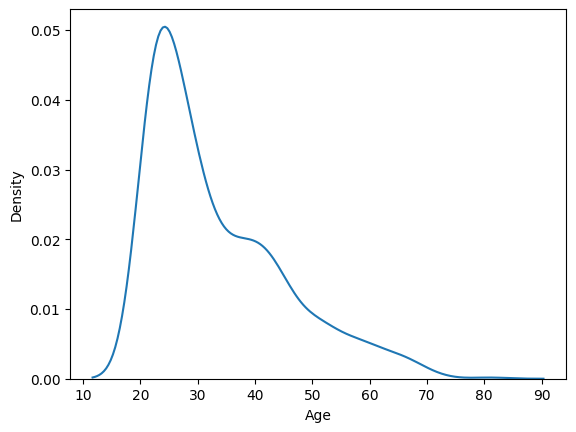

In [28]:
sns.kdeplot(diabetes['Age'])

In [29]:
skew(diabetes['Age'])

1.1264266838151251

In [30]:
diabetes['Age'].skew()

1.128632240693178

<AxesSubplot:ylabel='Density'>

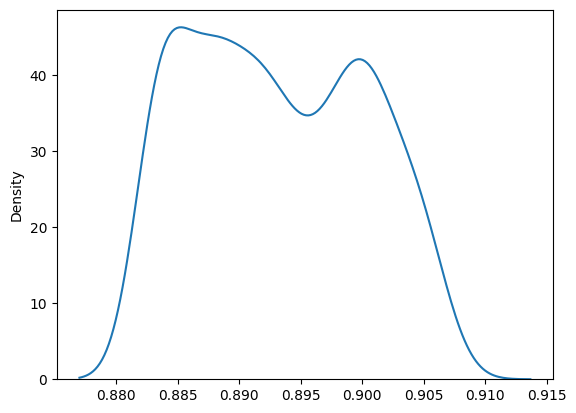

In [33]:
age1 = boxcox(diabetes['Age'])[0]
sns.kdeplot(age1)

In [34]:
skew(age1)

0.14634729789600107

<AxesSubplot:xlabel='Age'>

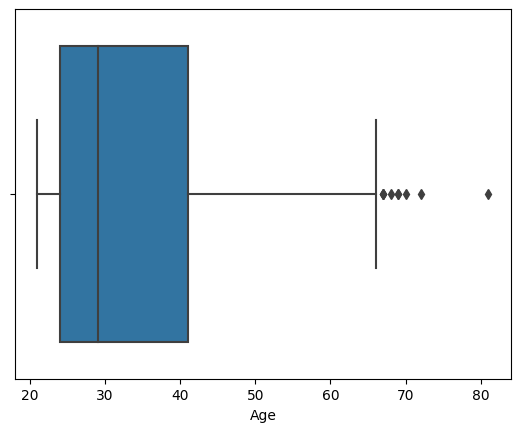

In [35]:
sns.boxplot(diabetes['Age'])

<AxesSubplot:>

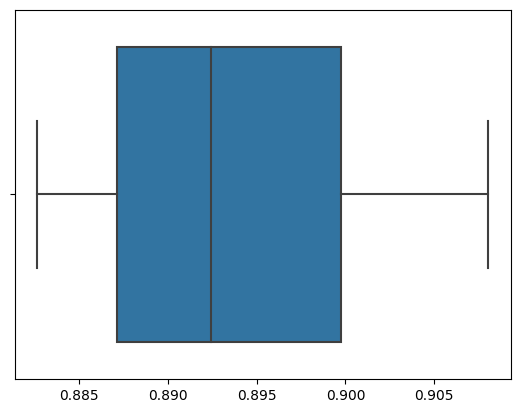

In [36]:
sns.boxplot(age1)

<AxesSubplot:xlabel='B'>

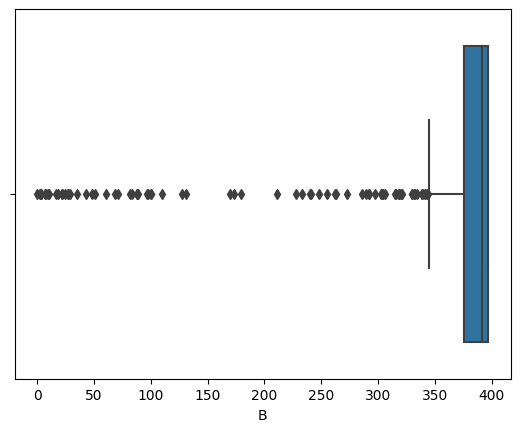

In [37]:
sns.boxplot(boston_df['B'])

<AxesSubplot:>

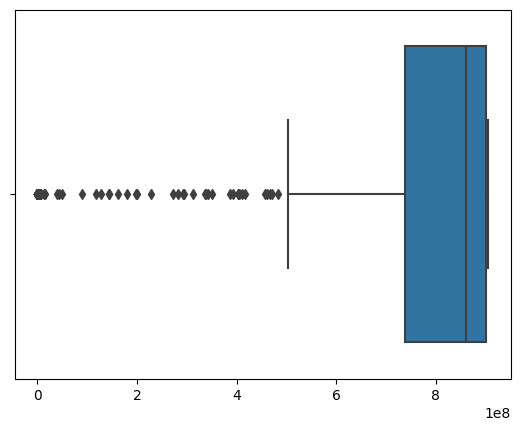

In [38]:
sns.boxplot(boxcox(boston_df['B'])[0])

<AxesSubplot:xlabel='B', ylabel='Density'>

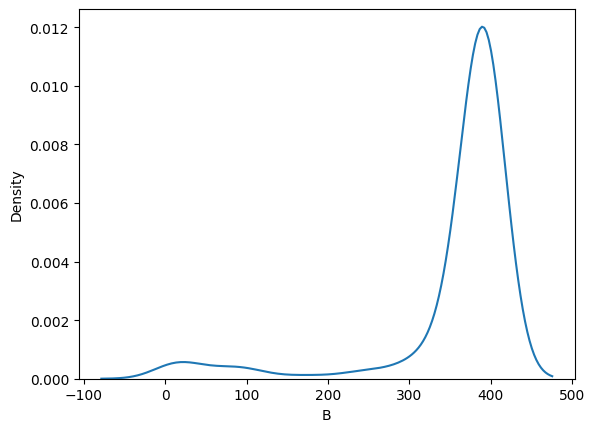

In [39]:
sns.kdeplot(boston_df['B'])

<AxesSubplot:ylabel='Density'>

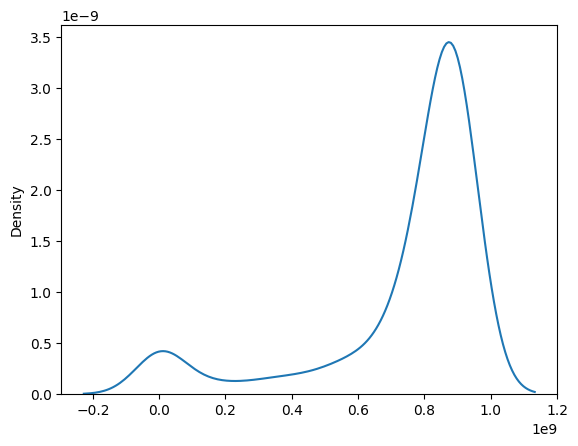

In [40]:
sns.kdeplot(boxcox(boston_df['B'])[0])

## 7. Yeo-Johnson Transformer

In [ ]:
Overcomes the limitations of boxcox

Gaussian Distribution

Apply a power transformer featurewise to make it data guassian like.

<AxesSubplot:xlabel='Age'>

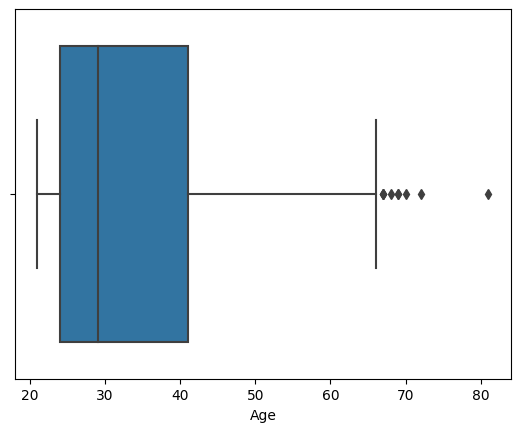

In [41]:
sns.boxplot(diabetes['Age'])

<AxesSubplot:>

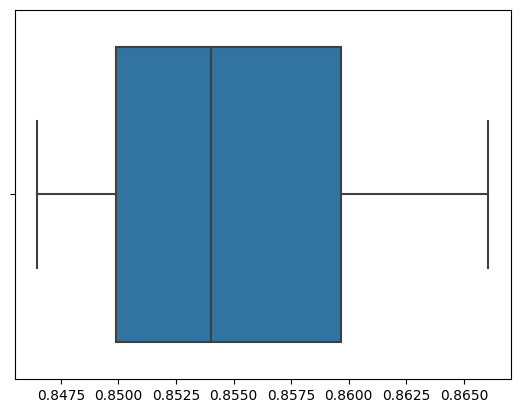

In [43]:
age2 = yeojohnson(diabetes['Age'])[0]
sns.boxplot(age2)

<AxesSubplot:>

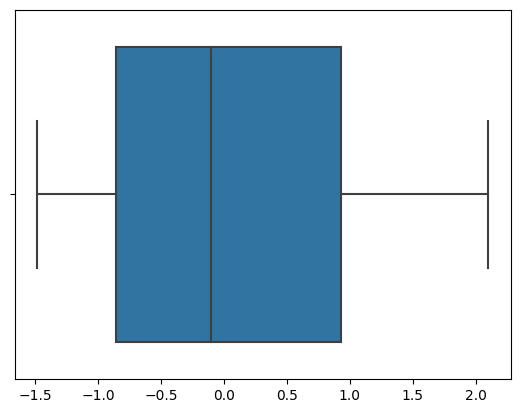

In [47]:
power_trans = PowerTransformer()
age3 = power_trans.fit_transform(diabetes[['Age']])[:,0]
sns.boxplot(age3)

<AxesSubplot:xlabel='B'>

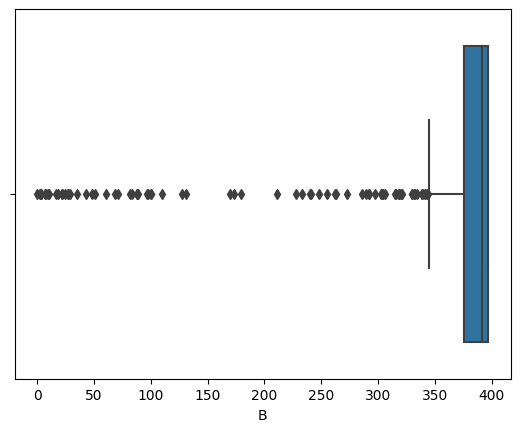

In [48]:
sns.boxplot(boston_df['B'])

<AxesSubplot:>

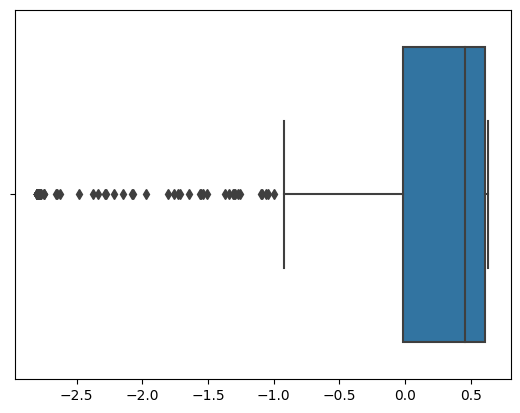

In [50]:
bstn_B = power_trans.fit_transform(boston_df[['B']])[:,0]
sns.boxplot(bstn_B)

<AxesSubplot:>

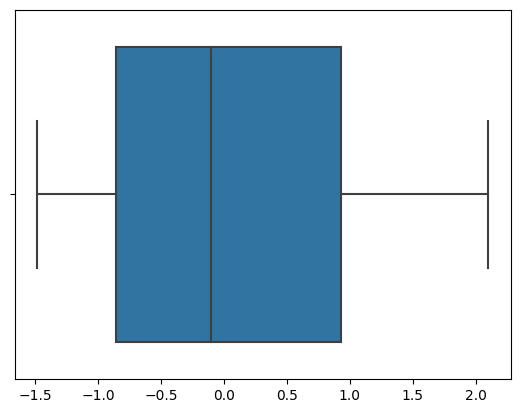

In [51]:
power_trans = PowerTransformer(method='yeo-johnson')   # Default 
age3 = power_trans.fit_transform(diabetes[['Age']])[:,0]
sns.boxplot(age3)

<AxesSubplot:>

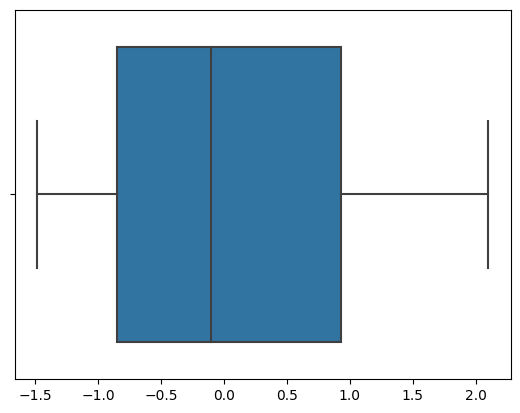

In [52]:
power_trans = PowerTransformer(method='box-cox')   # Default 
age3 = power_trans.fit_transform(diabetes[['Age']])[:,0]
sns.boxplot(age3)